In [1]:
"""
Purpose:
--------
Demonstrate how to query the h01 c2 datajoint data products
using the modularized API class
"""

'\nPurpose:\n--------\nDemonstrate how to query the h01 c2 datajoint data products\nusing the modularized API class\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import connects_neuvue

# Step 1: Import API and configure API object with aws secret

In [4]:
from connects_neuvue.utils import aws_utils as aws
secret_dict = aws.get_secret()

In [5]:
from connects_neuvue.h01_c2 import api
fetcher = api.API(secret_dict=secret_dict)
fetcher

/usr/local/lib/python3.8/dist-packages/python_jsonschema_objects/__init__.py:113: UserWarning: Schema id not specified. Defaulting to 'self'
  warnings.warn("Schema id not specified. Defaulting to 'self'")
[2025-04-30 16:48:09,977][INFO]: Connecting admin@neurd-datajoint.cluster-cjc6cqmcqirl.us-east-1.rds.amazonaws.com:3306
INFO - 2025-04-30 16:48:09,977 - connection - Connecting admin@neurd-datajoint.cluster-cjc6cqmcqirl.us-east-1.rds.amazonaws.com:3306
[2025-04-30 16:48:10,473][INFO]: Connected admin@neurd-datajoint.cluster-cjc6cqmcqirl.us-east-1.rds.amazonaws.com:3306
INFO - 2025-04-30 16:48:10,473 - connection - Connected admin@neurd-datajoint.cluster-cjc6cqmcqirl.us-east-1.rds.amazonaws.com:3306


# Application 0: Fetch soma features

In [6]:
segment_id = 3748267179
key = dict(segment_id=segment_id)

In [7]:
soma_center = fetcher.fetch_soma_center(segment_id)
soma_center

array([260428, 157798,   1275])

In [8]:
mesh = fetcher.fetch_segment_id_mesh(**key)

In [9]:
fetcher.soma_table & key

segment_id ID for segment in this materialization,decimation_ratio,soma_idx,centroid_x (EM voxels),centroid_y (EM voxels),centroid_z (EM voxels),centroid_x_nm nm x coordinate of soma,centroid_y_nm nm y coordinate of soma,centroid_z_nm nm z coordinate of soma,n_vertices number of vertices in mesh,n_faces number of faces in mesh,n_synapses_pre number of synapses coming from soma,n_synapses_post number of synapses onto soma,sdf sdf width,volume volume in billions of nm^3 of the convex hull,surface_area surface area in millions of nm^2,max_side_ratio maximum of side length ratios used in check_if_soma,bbox_volume_ratio ratio of (axis aligned) bbox volume to mesh volume used in check_if_soma,max_hole_length euclidean distance of maximum hole size
3748267179,0.18,1,260428,157798,1275,2083425.0273357113,1262386.539648786,42107.64095554879,29156,58436,4,15,0.799,2856.538,1012.172,1.326,2.637,307445.032


In [10]:
soma_mesh = fetcher.fetch_soma_mesh(
    original_mesh = mesh,
    plot_soma=True,
    **key)
soma_mesh

Plotting soma: <trimesh.Trimesh(vertices.shape=(29156, 3), faces.shape=(58436, 3))>


/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

<trimesh.Trimesh(vertices.shape=(29156, 3), faces.shape=(58436, 3))>

In [11]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    mesh,
    meshes = [soma_mesh],
    meshes_colors="red",
)

Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

# Application 1: Fetch whole segment autoproofread meta data

In [12]:
segment_df = fetcher.autoproof_segment_metadata_df()
segment_df

,segment_id,decimation_ratio,split_index,multiplicity,cell_type_used,cell_type,nucleus_id,nuclei_distance,n_nuclei_in_radius,n_nuclei_in_bbox,...,dendrite_bbox_x_min_soma_relative,dendrite_bbox_y_min_soma_relative,dendrite_bbox_z_min_soma_relative,dendrite_bbox_x_max_soma_relative,dendrite_bbox_y_max_soma_relative,dendrite_bbox_z_max_soma_relative,dendrite_n_limbs,dendrite_soma_angle_max,dendrite_soma_angle_min,run_time
0,532997033,0.18,0,1,baylor,excitatory,22398,5083.70,1,1,...,-77563.506514,-390553.746566,-8746.439581,188951.220930,230124.044510,46051.024160,4,123.51,26.72,1729.66
1,563380250,0.18,0,1,baylor,excitatory,39855,5260.66,1,1,...,-30031.202792,-61906.580473,-7542.286098,29889.078924,41601.269976,30194.551644,4,87.80,35.25,319.89
2,605664990,0.18,0,1,baylor,excitatory,23144,3459.54,1,1,...,-143650.283912,-129097.583932,-22879.767839,164588.855123,124575.335213,31876.024926,5,142.24,18.56,1495.58
3,736562062,0.18,0,1,baylor,excitatory,22623,4300.24,1,1,...,-99758.188101,-211970.236791,-13739.114961,137572.193241,180819.206831,104680.243353,4,139.64,23.93,1333.29
4,737803275,0.18,0,1,baylor,excitatory,23077,2289.79,1,1,...,-195906.024260,-443446.808846,-35141.951845,214478.099914,237218.342855,138291.136865,8,147.94,15.30,891.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,50539976098,0.18,0,1,baylor,excitatory,23307,4222.19,1,1,...,-59846.316224,-48436.397486,-28385.561237,248781.606887,292994.817313,24165.051816,7,149.76,19.77,1427.71
78,51238458569,0.18,0,1,baylor,excitatory,46303,1814.57,1,1,...,-8108.198718,-8761.890234,-5680.045626,9420.644568,6844.807360,5057.103666,1,79.63,79.63,24.25
79,63306566360,0.18,0,1,baylor,inhibitory,39414,1951.41,1,1,...,-33176.219263,-17559.945309,-20237.975555,104100.094376,23183.075029,4111.581500,2,116.85,61.58,68.72
80,74884149164,0.18,0,1,baylor,excitatory,44123,6717.82,1,1,...,-46281.397782,-42186.365824,-5324.432070,174539.800094,30444.178114,41879.017407,2,119.16,45.43,331.41


# Application 2: Fetch neuron branch level nx object

In [13]:
segment_id = 3905170220
G = fetcher.nx_graph_autoproof_from_segment_id(segment_id) 
G

In [14]:
G.nodes()

NodeView(('S0', 'L0_1', 'L0_0', 'L0_2', 'L1_1', 'L1_0', 'L1_2', 'L2_0', 'L2_1', 'L2_2', 'L3_0', 'L4_0', 'L5_0', 'L6_1', 'L6_0', 'L6_2', 'L6_4', 'L6_3', 'L6_5'))

In [15]:
# get a branch-level specific metdata (includes bounding box)
G.nodes["L4_0"]

{'area': 45.71658900110658,
 'compartment': 'basal',
 'axon_compartment': 'dendrite',
 'boutons_cdfs': None,
 'boutons_volume': None,
 'labels': ['basal'],
 'mesh_center': array([1794789.84473552,  400258.86086453,   63362.73046038]),
 'endpoint_upstream': array([1791495.05957152,  396734.3533971 ,   63553.39      ]),
 'endpoint_downstream': array([1794980.28240528,  402430.15280338,   59837.3587547 ]),
 'mesh_volume': 123.57183510289322,
 'n_boutons': 0,
 'n_spines': 1,
 'n_synapses': 0,
 'n_synapses_head': 0,
 'n_synapses_neck': 0,
 'n_synapses_no_head': 0,
 'n_synapses_post': 0,
 'n_synapses_pre': 0,
 'n_synapses_shaft': 0,
 'n_synapses_spine': 0,
 'skeletal_length': 11020.38036014731,
 'spine_density': 9.074096966891195e-05,
 'spine_volume_density': 10388.440718195336,
 'spine_volume_median': 114484568.06335449,
 'synapse_density': 0.0,
 'synapse_density_post': 0.0,
 'synapse_density_pre': 0.0,
 'total_spine_volume': 114484568.06335449,
 'width': 406.898008428679,
 'width_new': {'m

### (Optional) Visualize if you installed the neuron_morphology_tools packaged

In [16]:
try:
    from neuron_morphology_tools import neuron_nx_utils as nxu
except:
    raise Exception("install neuron_morphology_tools: \npip3 install git+https://github.com/reimerlab/neuron_morphology_tools.git")

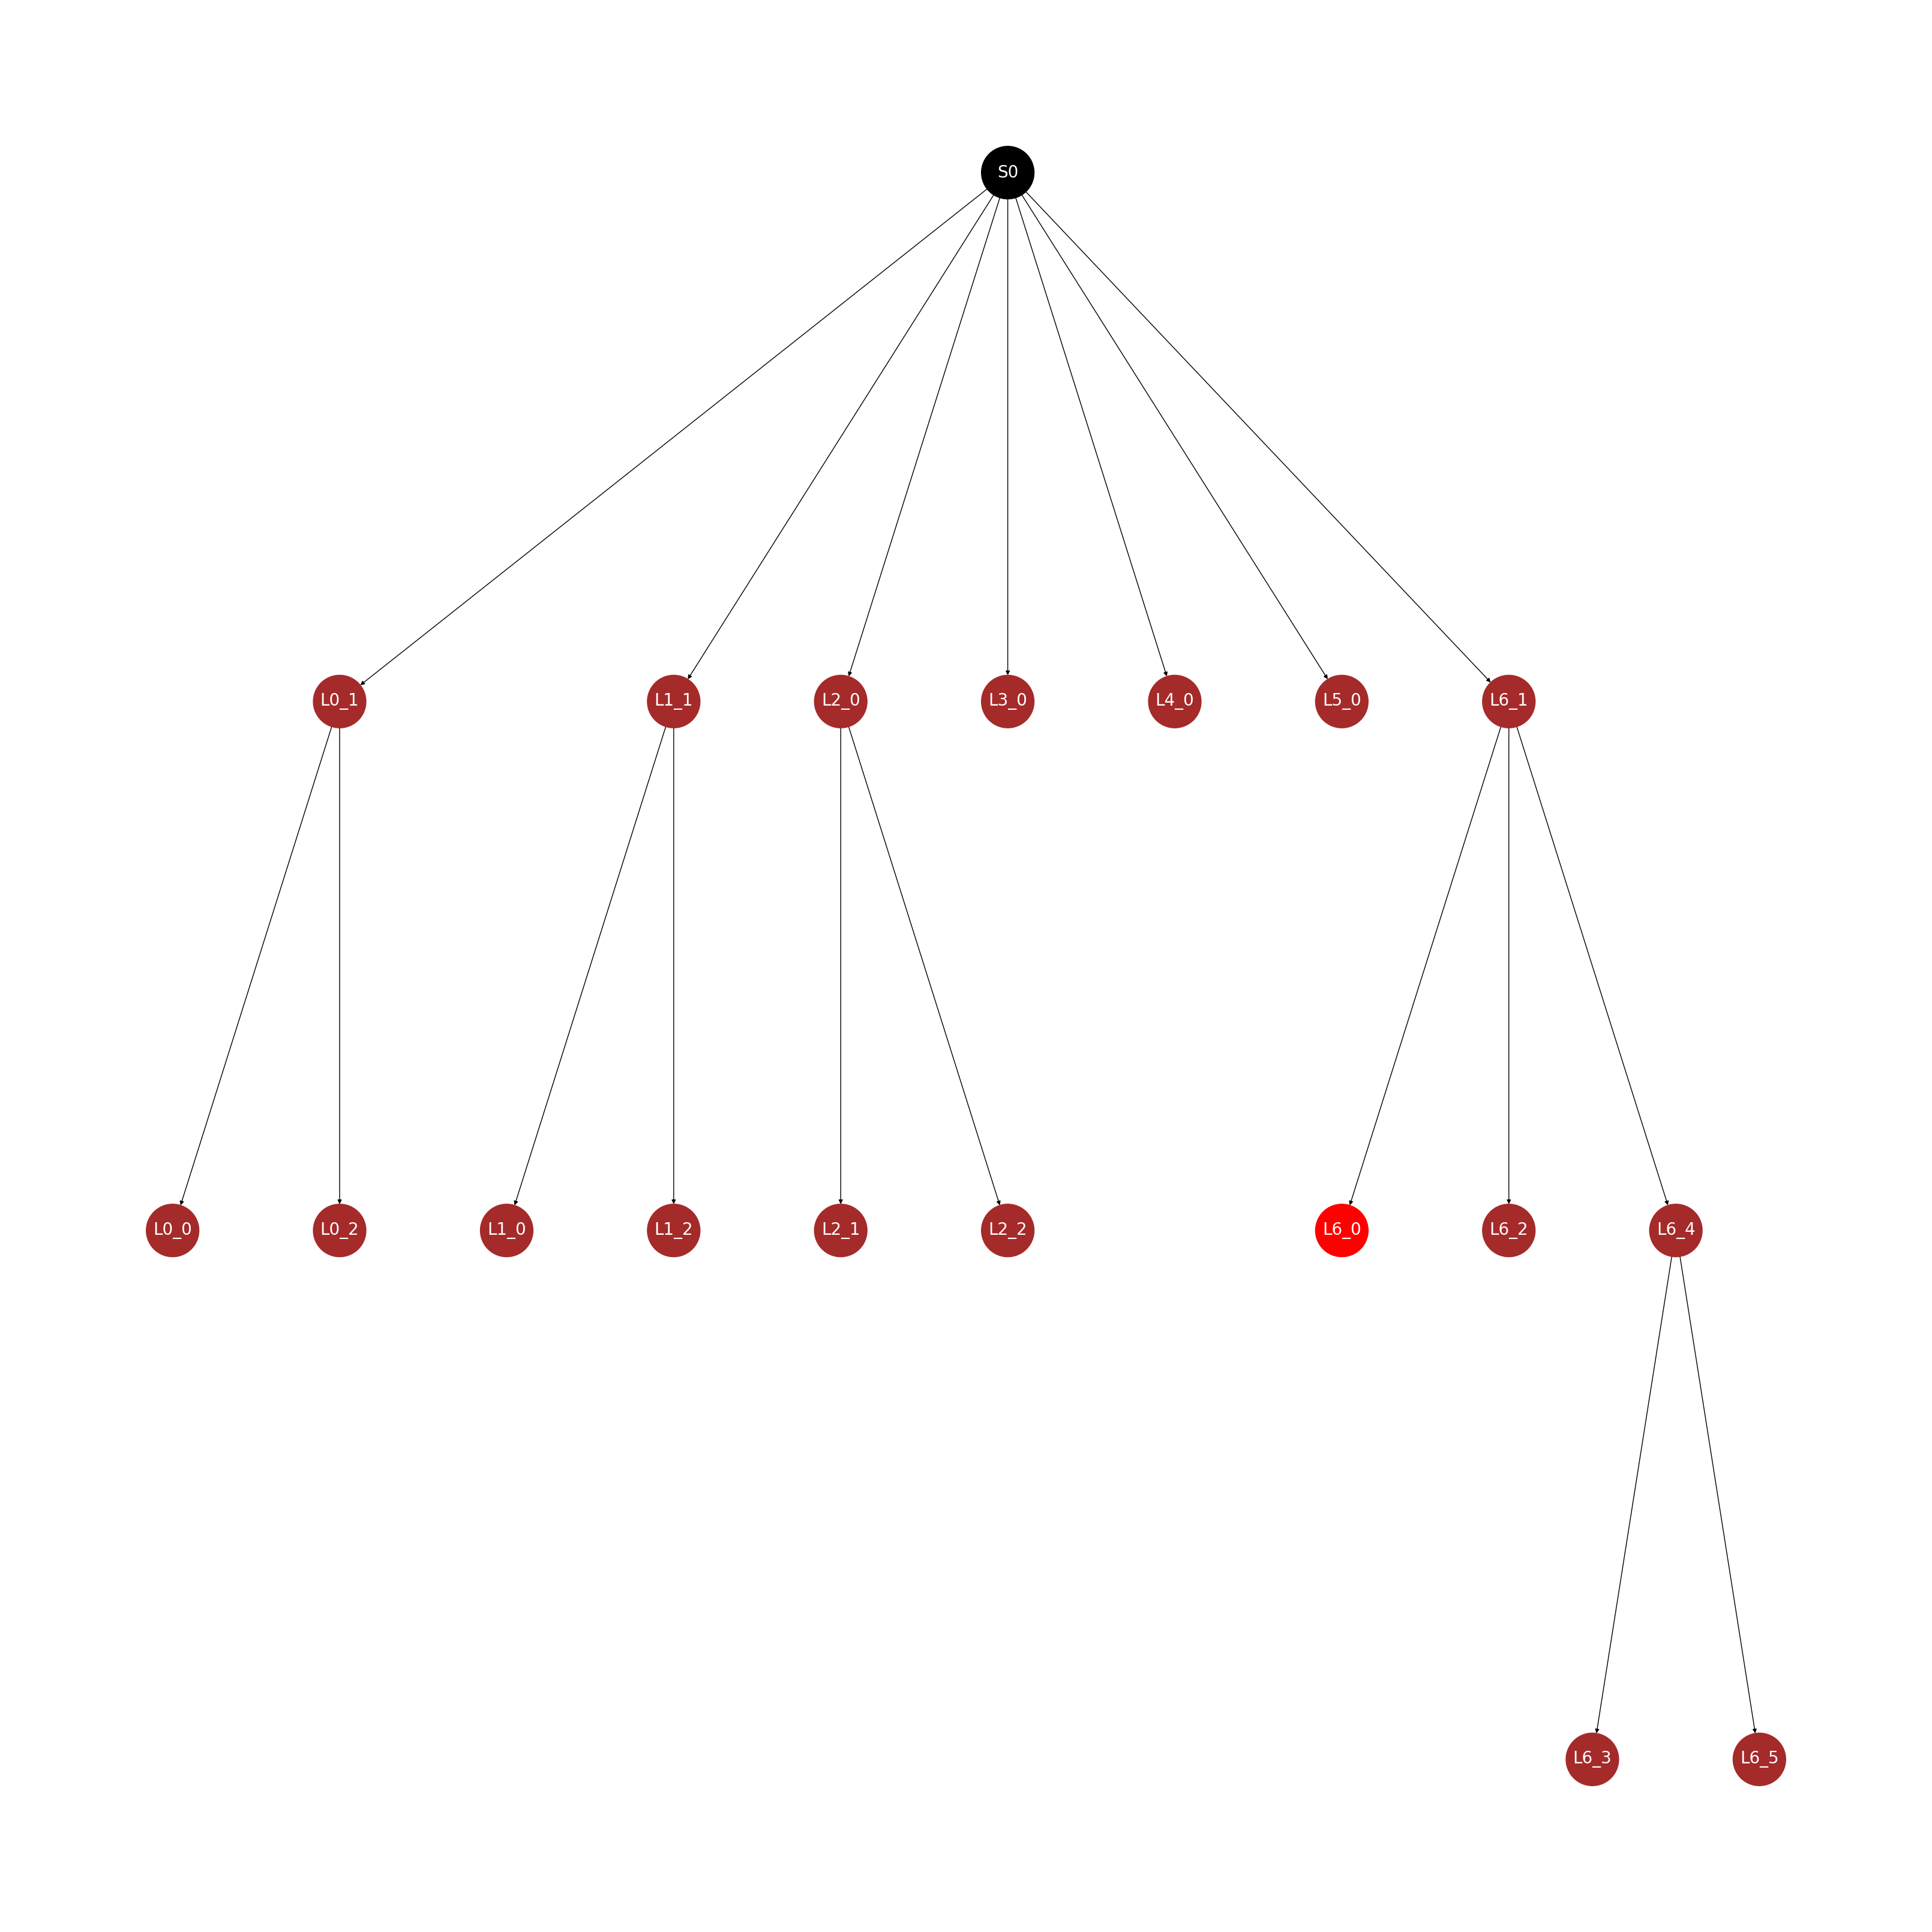

In [17]:
nxu.draw_tree(G)

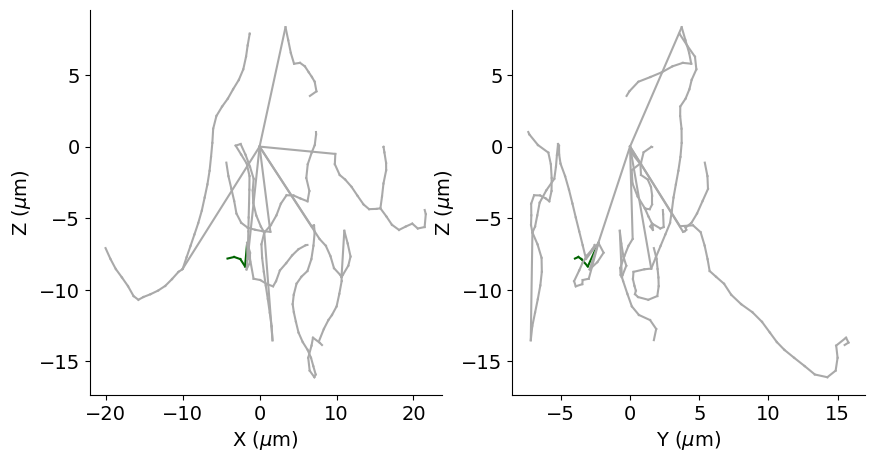

In [18]:
nxu.plot(G)

# Application 3: Fetch split points

In [19]:
"""
Current populated segments

38115897621
3748267179

"""

'\nCurrent populated segments\n\n38115897621\n3748267179\n\n'

In [20]:
split_df = fetcher.red_blue_split_df_from_segment_id(
    segment_id = 3748267179,
    split_index = 0,
)
split_df

,segment_id,split_index,error_type,cut_id,filter_cut_id,limb_name,limb_split_idx,skeletal_length,parent_branch_width,n_error_branches,valid_points,valid_pre_coordinates,valid_post_coordinates,error_points,error_branches_skeleton_points,error_pre_coordinates,error_post_coordinates,merge_coordinate_x_nm,merge_coordinate_y_nm,merge_coordinate_z_nm
0,3748267179,0,axon_on_dendrite_merges,0,0,L0,0,44512.925,2035.295,1,"[[2094772.0, 1249950.0, 40129.96333333333], [2...","[[2093832.0, 1249376.0, 38412.0], [2093832.0, ...","[[2093608.0, 1249431.9999999998, 38346.0], [20...","[[2096081.3333333333, 1246947.3333333333, 3778...","[[2094770.0, 1247020.0, 40503.8], [2095468.336...",[],"[[2104344.0, 1247240.0, 27852.0], [2108608.0, ...",2.094770e+06,1.247020e+06,40503.800000
1,3748267179,0,axon_on_dendrite_merges,1,1,L0,1,7374.600,1495.242,1,"[[2104729.0, 1234497.0, 44270.96666666667], [2...","[[2095120.0, 1243872.0, 41415.0], [2096167.999...","[[2094776.0, 1244392.0, 41283.0], [2094792.0, ...","[[2103867.3333333335, 1230895.0, 48274.0233333...","[[2103500.0, 1227920.0, 51999.5], [2103834.984...",[],[],2.104810e+06,1.231570e+06,45999.000000
2,3748267179,0,axon_on_dendrite_merges,2,2,L0,2,13785.432,714.942,1,"[[2113100.0, 1221706.3333333333, 50523.0433333...",[],"[[2115712.0, 1218936.0, 53856.0]]","[[2114587.3333333335, 1222478.0, 54193.8133333...","[[2113920.0, 1221500.0, 51466.2], [2114346.205...",[],[],2.113920e+06,1.221500e+06,51466.200000
3,3748267179,0,axon_on_dendrite_merges,3,3,L0,3,7372.925,794.587,1,"[[2128354.6666666665, 1204038.6666666667, 5715...","[[2138903.9999999995, 1192815.9999999998, 5933...","[[2127432.0, 1205711.9999999998, 57948.0], [21...","[[2131629.3333333335, 1200024.0, 58641.12], [2...","[[2130150.0, 1201760.0, 57989.1], [2131137.484...","[[2131032.0, 1199416.0, 58179.0]]",[],2.130150e+06,1.201760e+06,57989.100000
4,3748267179,0,axon_on_dendrite_merges,4,4,L0,4,29324.058,977.287,1,"[[2140546.3333333335, 1189645.6666666667, 6213...","[[2138903.9999999995, 1192815.9999999998, 5933...","[[2136072.0, 1197200.0, 59928.0], [2135984.0, ...","[[2143842.0, 1184456.3333333333, 62298.6300000...","[[2142173.4640298006, 1187039.8975326337, 6215...",[],"[[2147208.0, 1171368.0, 57948.0], [2145320.0, ...",2.142173e+06,1.187040e+06,62158.797958
5,3748267179,0,axon_on_dendrite_merges,5,5,L2,0,37380.209,924.454,1,"[[2073388.6666666667, 1262340.6666666667, 3667...","[[1977336.0, 1287935.9999999998, 27192.0], [20...","[[1989736.0, 1275295.9999999998, 34188.0], [20...","[[2071557.0, 1261344.6666666667, 34455.53], [2...","[[2060733.7241222132, 1257801.534086633, 2622....",[],"[[2061272.0, 1258351.9999999998, 9735.0], [206...",2.073055e+06,1.262146e+06,36763.723963
6,3748267179,0,axon_on_dendrite_merges,6,6,L4,0,9161.766,352.972,1,"[[2064277.3333333333, 1311885.6666666667, 7266...","[[2077264.0, 1300824.0, 75141.0]]","[[2047960.0000000002, 1324680.0, 67881.0], [20...","[[2062504.0, 1312802.6666666667, 74745.11], [2...","[[2062118.353132373, 1313933.6974842912, 71982...",[],"[[2062504.0, 1313848.0, 72303.0]]",2.062118e+06,1.313934e+06,71982.795851
7,3748267179,0,high_degree_branching,7,0,L1,0,224864.902,257.868,17,"[[2067888.6666666667, 1278164.3333333333, 3771...","[[2067872, 1281288, 35541]]","[[2056736, 1295392, 32142], [2056760, 1295384,...","[[2067705.0, 1278886.0, 33545.04666666667], [2...","[[2044192.0, 1285559.9999999998, 43279.39], [2...","[[2059824, 1281488, 42570], [2059840, 1281488,...","[[2091472, 1261608, 28842]]",2.067034e+06,1.280051e+06,36061.864492


# Application 4: Fetching AutoProofread Meshes and Skeletons

In [21]:
key = dict(
    segment_id = 3748267179,
)

In [22]:
decimated_mesh = fetcher.fetch_segment_id_mesh(**key)

In [23]:
proofread_mesh = fetcher.fetch_proofread_mesh(
    original_mesh = decimated_mesh,
    **key)
proofread_mesh

<trimesh.Trimesh(vertices.shape=(224933, 3), faces.shape=(462721, 3))>

In [24]:
proofread_skeleton = fetcher.fetch_proofread_skeleton(
    **key)
proofread_skeleton

array([[[2090580.        , 1253630.        ,   40263.1       ],
        [2090660.        , 1253480.        ,   40243.7       ]],

       [[2090660.        , 1253480.        ,   40243.7       ],
        [2090780.        , 1253260.        ,   40225.6       ]],

       [[2090780.        , 1253260.        ,   40225.6       ],
        [2090930.        , 1253000.        ,   40180.6       ]],

       ...,

       [[2083425.02733571, 1262386.53964879,   42107.64095555],
        [2074659.5       , 1262874.515625  ,   36975.49390625]],

       [[2083425.02733571, 1262386.53964879,   42107.64095555],
        [2075001.71928172, 1261594.14445105,   48699.57291952]],

       [[2083425.02733571, 1262386.53964879,   42107.64095555],
        [2081797.        , 1267915.        ,   52473.15      ]]])

In [25]:
from datasci_tools import ipyvolume_utils as ipvu
ipvu.plot_objects(
    mesh,
    meshes = [proofread_mesh],
    meshes_colors="red",
    skeletons = [proofread_skeleton],
    skeletons_colors="blue",
)

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…

### Fetching the proofread axon, dendrite separtely

In [26]:
decimated_mesh = fetcher.fetch_segment_id_mesh(**key)

In [27]:
dendrite_mesh = fetcher.fetch_proofread_mesh_dendrite(original_mesh=decimated_mesh,**key)
dendrite_skeleton = fetcher.fetch_proofread_skeleton_dendrite(**key)
axon_mesh = fetcher.fetch_proofread_mesh_axon(original_mesh=decimated_mesh,**key)
axon_skeleton = fetcher.fetch_proofread_skeleton_axon(**key)
soma_mesh = fetcher.fetch_soma_mesh(original_mesh=decimated_mesh,**key)

dendrite_color = "purple"
axon_color = "red"
soma_color = "brown"

meshes = [dendrite_mesh,axon_mesh,soma_mesh]
skeletons = [dendrite_skeleton,axon_skeleton]
colors = [dendrite_color,axon_color]
meshes_colors = colors + [soma_color]

ipvu.plot_objects(
    decimated_mesh,
    meshes = meshes,
    meshes_colors=meshes_colors,
    skeletons = skeletons,
    skeletons_colors=colors,
)

/usr/local/lib/python3.8/dist-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float64". A coerced copy has been created.
  warnings.warn(


Container(figure=Figure(box_center=[0.5, 0.5, 0.5], box_size=[1.0, 1.0, 1.0], camera=PerspectiveCamera(fov=45.…